In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
#Miscellanous libraries
from collections import Counter

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA/Just 8k - Sheet1.csv')

data.head(10)

,id,text,label
0,0,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন।,negative
1,1,এটা কেন হচ্ছে? সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে?...,negative
2,2,আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...,negative
3,3,চুরি নয় লুটপাট।,negative
4,4,ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...,neutral
5,5,একটা ভাল প্রতিষ্ঠান কিভাবে লুট হয়ে যাচেছ!,negative
6,6,সরকার যাদের এই ব্যাংকে নিয়গ দিয়েছে তারা ব্যাংক...,negative
7,7,পুরোপুরি আওয়ামীকরন হলেই আর এর অসতিতই থাকবেক না!,negative
8,8,এককথায় ব্যাংকটিতে ডাকাতি হয়েছে এবং হতেই থাকবে।,negative
9,9,ইসলামি ব্যাংক প্রারম্ভ থেকেই গ্রাহকদের পছন্দের...,negative


In [ ]:
data.dropna(inplace=True)

In [ ]:
print("Total Reviews:",len(data),
      "\nTotal Positive Reviews:",len(data[data.label =='positive']),
      "\nTotal Negative Reviews:",len(data[data.label=='negative']),
      "\nTotal Neutral Reviews:",len(data[data.label =='neutral']))


Total Reviews: 8066 
Total Positive Reviews: 2829 
Total Negative Reviews: 3245 
Total Neutral Reviews: 1992


In [ ]:
data.columns

Index(['id', 'text', 'label'], dtype='object')

In [ ]:
# print some unprocessed reviews
sample_data = [10,100,150,222,250,600,650,666,689,640,650,700,750,800,1000]
for i in sample_data:
      print(data.text[i],'\n','Sentiment:-- ',data.label[i],'\n')

এরা যেখানেই যাবে সেখানেই চুরি হবে। 
 Sentiment:--  negative 

নিক্কেই এশিয়ান রিভিউবাংলাদেশের উত্থানের পেছনে শেখ হাসিনা 
 Sentiment:--  positive 

সার্বিক বিবেচনায় পোশাক শ্রমিকদের বেতন বাড়ানো উচিত। বর্তমান বাজার মূল্য বিবেচনা করলে সর্ব নিম্ন বেতন হওয়া দরকার ১২০০০-১৫০০০ টাকা। যেথানে এখন শ্রমিকরা বেতন পাচ্ছেন ৫৩০০ টাকা। 
 Sentiment:--  negative 

কত উচ্চ পর্যায়ে যোগাযোগ ? 
 Sentiment:--  negative 

বাংলাদেশের সর্বত্র এরকম অসংখ্য দুর্নীতিবাজ বাচ্চু ছড়িয়ে ছিটিয়ে রয়েছে। তারা  উন্নয়নের এক একটি মাইলফলক। 
 Sentiment:--  negative 

বাংলাদেশের গার্মেন্টস আসলে দরিদ্র, অসহায় ও প্রান্তিক মানুষদের শ্রম শোষণ ইন্ডাস্ট্রী। 
 Sentiment:--  positive 

এখানেই বিএনপির পার্থক্য আওয়ামী লীগের সাথে। বাস্তবে উনারা ভুলে গেছেন ডিমেনশিয়া রোগীর মত. 
 Sentiment:--  positive 

সন্মান করা কবে শিখবেন? মেঘে মেঘে অনেক বেলা হয়ে গেছে। 
 Sentiment:--  positive 

কি করে সম্ভব বলেন ? আমাদের জিডিপি কতো ? মূল্যস্ফীতি আর অর্থনৈতিক প্রবৃদ্ধি এর স্প্রীড কতো? 
 Sentiment:--  positive 

যুক্তির অপর নাম এখন গুম। আর যুক্তির কথা বলছেন? 

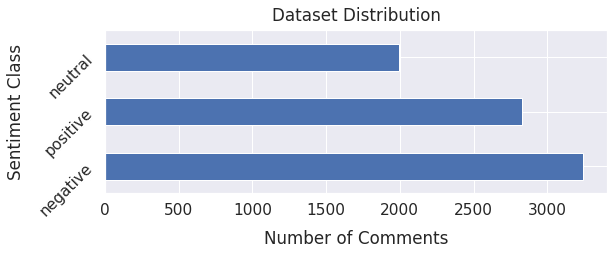

In [ ]:
sns.set(font_scale=1.4)
data['label'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

In [ ]:
!pip install bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bnlp import BasicTokenizer
from bnlp.corpus import stopwords, punctuations, letters, digits
import re

btokenizer = BasicTokenizer()

def clean_text(text):
    text = re.sub('[^\u0980-\u09FF]',' ',str(text))
    tokens = btokenizer.tokenize(text)
    filtered = []
    for i in tokens:
        if i in stopwords:
            continue
    
        if i in punctuations + '‘' + '’':
            continue
    
        filtered.append(i)
    
    return " ".join(filtered)

In [ ]:
data['cleaned'] = data.text.apply(clean_text)

In [ ]:
# Apply the function into the dataframe
data['cleaned'] = data['text'].apply(clean_text)  

# print some cleaned reviews from the dataset
sample_data = [10,100,25,854,966,1500,1589,1700,2000,2500,4000,4500]
for i in sample_data:
     print('Original:\n',data.text[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Sentiment:-- ',data.label[i],'\n')

Original:
 এরা যেখানেই যাবে সেখানেই চুরি হবে। 
Cleaned:
 যেখানেই সেখানেই চুরি 
 Sentiment:--  negative 

Original:
 নিক্কেই এশিয়ান রিভিউবাংলাদেশের উত্থানের পেছনে শেখ হাসিনা 
Cleaned:
 নিক্কেই এশিয়ান রিভিউবাংলাদেশের উত্থানের পেছনে শেখ হাসিনা 
 Sentiment:--  positive 

Original:
 রতনে রতন চেনে 
Cleaned:
 রতনে রতন চেনে 
 Sentiment:--  negative 

Original:
 আমেরিকাতে ইমেল না সরাসরি চিঠি পাঠানো হয় । 
Cleaned:
 আমেরিকাতে ইমেল সরাসরি চিঠি পাঠানো 
 Sentiment:--  negative 

Original:
 এই অর্থ পাচারে বাংলাদেশ জড়িত আমি গ্যারান্টি দিয়ে বলতে পারি । এই বড় অর্থ ছাড়ের বিষয়ে বিদেশি ব্যাংক ক্রস চেক করে শতভাগ কনফার্ম হয়ে নেয় । তার পর অর্থ ছাড় করে । 
Cleaned:
 অর্থ পাচারে বাংলাদেশ জড়িত গ্যারান্টি দিয়ে বড় অর্থ ছাড়ের বিষয়ে বিদেশি ব্যাংক ক্রস চেক শতভাগ কনফার্ম হয়ে নেয় অর্থ ছাড় 
 Sentiment:--  positive 

Original:
 খবর যেমন পড়ি মন্তব্যগুলিও তেমন পড়ি। আর মন্তব্যকারীদের জ্ঞান বিদ্যা বুদ্ধির দৌড় দেখে হতাশ হই। 
Cleaned:
 খবর পড়ি মন্তব্যগুলিও পড়ি মন্তব্যকারীদের জ্ঞান বিদ্যা বুদ্ধির দৌড় হতাশ হই 
 Sentiment:--  nega

In [ ]:
data

,id,text,label,cleaned
0,0,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন।,negative,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন
1,1,এটা কেন হচ্ছে? সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে?...,negative,সংশ্লিষ্ট সকলের ডিপ্রেশনের সরকার মনোনিত পরিচাল...
2,2,আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...,negative,দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে বাধাগ্রস...
3,3,চুরি নয় লুটপাট।,negative,চুরি লুটপাট
4,4,ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...,neutral,ইসলামী ব্যাংকের বর্তমান অবস্থা শাসক জামাতের সা...
...,...,...,...,...
8061,8061,এইতো সময় মতো মনে করে দিলেন! এখনতো বাড়বেই।,neutral,এইতো সময় এখনতো বাড়বেই
8062,8062,সেই ১৯৫৩ সাল থেকে ফাঁটা বাশ বেজেই যাচ্ছে। নাদে...,neutral,১৯৫৩ সাল ফাঁটা বাশ বেজেই নাদের আলী বড় হব
8063,8063,তাই নাকি অলরেডি বেড়ে গেছে।,neutral,অলরেডি বেড়ে
8064,8064,"লুটপাট চলছে, চলবেই। পারলে ঠেকাও। না পারলে চুপ ...",neutral,লুটপাট চলছে চলবেই পারলে ঠেকাও পারলে চুপ থাকো


In [ ]:
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))

# Remove the reviews with least words
dataset = data.loc[data.length>2]
dataset = data.reset_index(drop = True)

In [ ]:
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(data)-len(dataset)),
      "\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 0 Small Reviews 
Total Reviews: 8066


In [ ]:
print("Maximum Length of a Review:",max(dataset.length))
print("Minimum Length of a Review:", min(dataset.length))
print("Average Length of a Review:",round(np.mean(dataset.length),0))

Maximum Length of a Review: 76
Minimum Length of a Review: 0
Average Length of a Review: 13.0


In [ ]:
dataset=dataset[['cleaned','label']]
dataset.head(5)

,cleaned,label
0,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন,negative
1,সংশ্লিষ্ট সকলের ডিপ্রেশনের সরকার মনোনিত পরিচাল...,negative
2,দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে বাধাগ্রস...,negative
3,চুরি লুটপাট,negative
4,ইসলামী ব্যাংকের বর্তমান অবস্থা শাসক জামাতের সা...,neutral


In [ ]:
#Dataset Summary

def data_summary(dataset):
    
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.label.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip() for t in list(dataset[dataset.label==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
                
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        
        # Documents per class
        documents.append(len(list(dataset[dataset.label==label].cleaned)))
        
        # Total Word per class
        words.append(len(word_list))
        
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.label==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
                
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label


documents,words,u_words,class_names = data_summary(dataset)   


Class Name :  negative
Number of Documents:3245
Number of Words:44647
Number of Unique Words:7592
Most Frequent Words:

টাকা	592
ব্যাংক	301
দেশের	258
দেশে	223
কথা	219
সরকার	216
হয়েছে	216
ব্যাংকের	196
দিয়ে	184
হয়ে	177

Class Name :  positive
Number of Documents:2829
Number of Words:37428
Number of Unique Words:8483
Most Frequent Words:

দেশের	212
টাকা	204
ভালো	190
কথা	174
একটা	159
দেশ	154
হয়ে	149
সাথে	143
ভাল	133
যায়	129

Class Name :  neutral
Number of Documents:1992
Number of Words:25378
Number of Unique Words:7496
Most Frequent Words:

টাকা	214
দেশের	144
কথা	122
হয়ে	110
হয়েছে	100
সরকার	100
ব্যাংক	88
দেশে	88
যায়	84
বাংলাদেশ	84
Total Number of Unique Words:16255


In [ ]:
dataset['label']=dataset['label'].replace({'positive':1,'negative':0,'neutral':2})
dataset.head()

,cleaned,label
0,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন,0
1,সংশ্লিষ্ট সকলের ডিপ্রেশনের সরকার মনোনিত পরিচাল...,0
2,দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে বাধাগ্রস...,0
3,চুরি লুটপাট,0
4,ইসলামী ব্যাংকের বর্তমান অবস্থা শাসক জামাতের সা...,2


In [ ]:
labels=dataset.label
labels

0       0
1       0
2       0
3       0
4       2
       ..
8061    2
8062    2
8063    2
8064    2
8065    2
Name: label, Length: 8066, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf1 = TfidfVectorizer(ngram_range=(1,1),use_idf=True,tokenizer=lambda x: x.split()) 
X = tfidf1.fit_transform(dataset['cleaned'])
y=dataset['label']
print("Shape of TF-IDF:",X.shape,'\n')

Shape of TF-IDF: (8066, 16255) 



In [ ]:
y

0       0
1       0
2       0
3       0
4       2
       ..
8061    2
8062    2
8063    2
8064    2
8065    2
Name: label, Length: 8066, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

Class=0, n=3245 (33.333%)
Class=2, n=3245 (33.333%)
Class=1, n=3245 (33.333%)


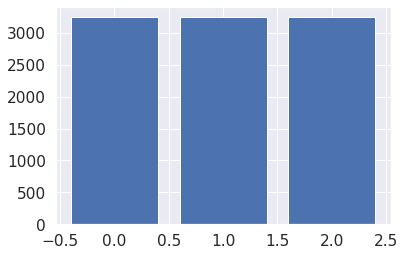

In [ ]:
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
review='দারুণ মানিয়েছে তোমাদের শুভকামনা	'
print("Sample Review: ",review)
vector = tfidf1.transform([review])
df = pd.DataFrame(vector.T.todense(), index=tfidf1.get_feature_names(), columns=["tfidf"])
a = df.sort_values(by=["tfidf"],ascending=False)
print(a[0:len(review.split())])

Sample Review:  দারুণ মানিয়েছে তোমাদের শুভকামনা	
             tfidf
দারুণ     0.588138
শুভকামনা  0.576812
তোমাদের   0.566905
ঁটি       0.000000


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size = 0.8, test_size = 0.2,random_state =500)

print('Shape of X_train:', xtrain.shape)
print('Shape of X_test:', xtest.shape)
print('Shape of Y_train:', ytrain.shape)
print('Shape of Y_test:', ytest.shape)

Shape of X_train: (7788, 16255)
Shape of X_test: (1947, 16255)
Shape of Y_train: (7788,)
Shape of Y_test: (1947,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
mn= MultinomialNB()
mn.fit(xtrain, ytrain)
prediction = mn.predict(xtest)
pred_prob1 = mn.predict_proba(xtest)
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, ytest)))

Accuracy: 79.35%


In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(ytest, prediction))


Classification Report

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       652
           1       0.78      0.80      0.79       633
           2       0.83      0.73      0.77       662

    accuracy                           0.79      1947
   macro avg       0.80      0.79      0.79      1947
weighted avg       0.80      0.79      0.79      1947



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

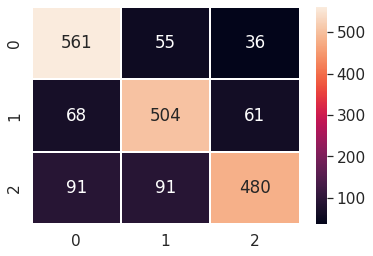

In [ ]:
conf_m = confusion_matrix(ytest, prediction)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

In [ ]:
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
fpr = {}
tpr = {}
thresh ={}
n_class = 3

In [ ]:
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ytest, pred_prob1[:,i], pos_label=i)

In [ ]:
pred_prob1 = mn.predict_proba(xtest)[:,1]

In [ ]:
fpr1 , tpr1, thresholds1 =metrics.roc_curve(ytest, pred_prob1,pos_label=1)

In [ ]:
knn= KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
knn.fit(xtrain, ytrain)
prediction = knn.predict(xtest)
pred_prob2 = knn.predict_proba(xtest)
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, ytest)))

Accuracy: 66.15%


In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(ytest, prediction))


Classification Report

              precision    recall  f1-score   support

           0       0.97      0.54      0.69       652
           1       0.69      0.61      0.65       633
           2       0.54      0.83      0.65       662

    accuracy                           0.66      1947
   macro avg       0.73      0.66      0.66      1947
weighted avg       0.73      0.66      0.66      1947



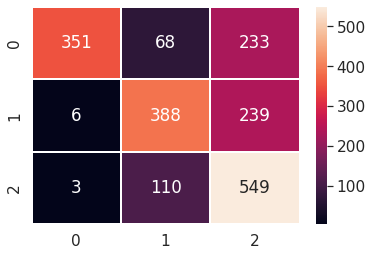

In [ ]:
conf_m = confusion_matrix(ytest, prediction)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

In [ ]:
pred_prob2 = knn.predict_proba(xtest)[:,1]
fpr2 , tpr2, thresholds2 =metrics.roc_curve(ytest, pred_prob2,pos_label=1)

In [ ]:
lsvm= SVC(kernel="linear", probability=True)
lsvm.fit(xtrain, ytrain)
prediction = lsvm.predict(xtest)
pred_prob3 = lsvm.predict_proba(xtest)
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, ytest)))

Accuracy: 83.15%


In [ ]:
print('\nClassification Report\n')
print(classification_report(ytest, prediction))


Classification Report

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       652
           1       0.84      0.81      0.82       633
           2       0.80      0.85      0.82       662

    accuracy                           0.83      1947
   macro avg       0.83      0.83      0.83      1947
weighted avg       0.83      0.83      0.83      1947



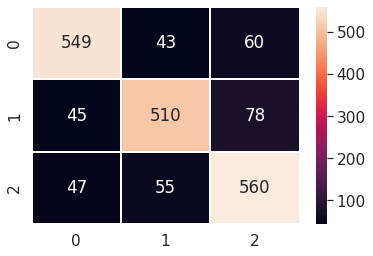

In [ ]:
conf_m = confusion_matrix(ytest, prediction)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

In [ ]:
pred_prob3 = mn.predict_proba(xtest)[:,1]
fpr3 , tpr3, thresholds3 =metrics.roc_curve(ytest, pred_prob3,pos_label=1)

In [ ]:
ksvm= SVC(kernel = 'rbf',probability=True)
ksvm.fit(xtrain, ytrain)
prediction = ksvm.predict(xtest)
pred_prob4 = ksvm.predict_proba(xtest)
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, ytest)))

Accuracy: 87.42%


In [ ]:
print('\nClassification Report\n')
print(classification_report(ytest, prediction))


Classification Report

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       652
           1       0.83      0.88      0.85       633
           2       0.89      0.85      0.87       662

    accuracy                           0.87      1947
   macro avg       0.87      0.87      0.87      1947
weighted avg       0.88      0.87      0.87      1947



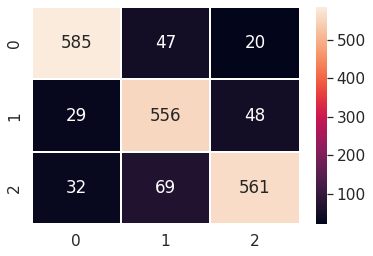

In [ ]:
conf_m = confusion_matrix(ytest, prediction)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

In [ ]:
pred_prob4 = ksvm.predict_proba(xtest)[:,1]
fpr4 , tpr4, thresholds4 =metrics.roc_curve(ytest, pred_prob4,pos_label=1)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
prediction = dt.predict(xtest)
pred_prob5 = dt.predict_proba(xtest)
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, ytest)))

Accuracy: 81.61%


In [ ]:
print('\nClassification Report\n')
print(classification_report(ytest, prediction))


Classification Report

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       652
           1       0.82      0.78      0.80       633
           2       0.80      0.81      0.80       662

    accuracy                           0.82      1947
   macro avg       0.82      0.82      0.82      1947
weighted avg       0.82      0.82      0.82      1947



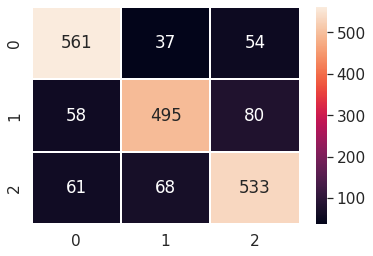

In [ ]:
conf_m = confusion_matrix(ytest, prediction)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

In [ ]:
pred_prob5 = dt.predict_proba(xtest)[:,1]
fpr5 , tpr5, thresholds5 =metrics.roc_curve(ytest, pred_prob5,pos_label=1)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
rf.fit(xtrain, ytrain)
prediction = rf.predict(xtest)
pred_prob6 = rf.predict_proba(xtest)
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, ytest)))


Accuracy: 85.88%


In [ ]:
print('\nClassification Report\n')
print(classification_report(ytest, prediction))


Classification Report

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       652
           1       0.87      0.82      0.84       633
           2       0.83      0.88      0.85       662

    accuracy                           0.86      1947
   macro avg       0.86      0.86      0.86      1947
weighted avg       0.86      0.86      0.86      1947



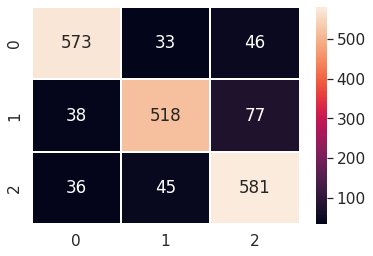

In [ ]:
conf_m = confusion_matrix(ytest, prediction)
sns.heatmap(conf_m, linewidths=1, annot=True, fmt='g')

In [ ]:
pred_prob6 = rf.predict_proba(xtest)[:,1]
fpr6 , tpr6, thresholds6 =metrics.roc_curve(ytest, pred_prob6,pos_label=1)

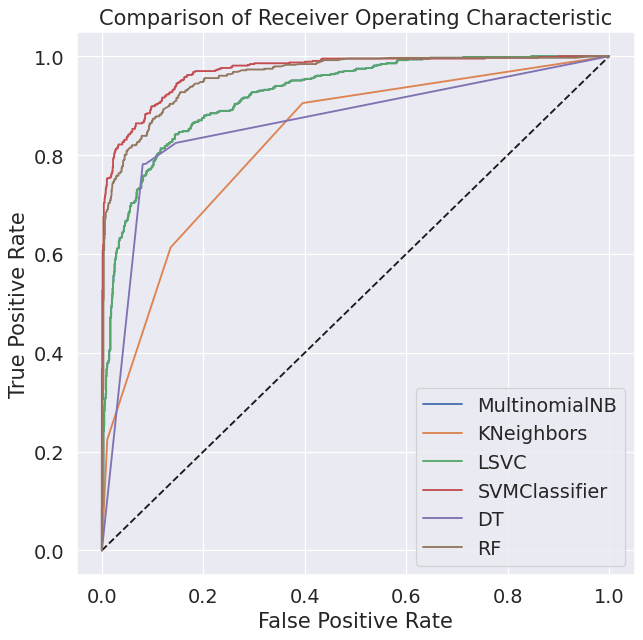

In [ ]:
plt.figure(figsize=(8, 8), dpi=90)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "MultinomialNB" )
plt.plot(fpr2, tpr2, label= "KNeighbors" )
plt.plot(fpr3, tpr3, label= "LSVC" )
plt.plot(fpr4, tpr4, label= "SVMClassifier")
plt.plot(fpr5, tpr5, label= "DT")
plt.plot(fpr6, tpr6, label= "RF")


plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Comparison of Receiver Operating Characteristic')
plt.show()